In [1]:
import os
import pandas as pd

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

X=np.load('data_X.npy')
y=np.load('data_y.npy')

In [3]:
print(X.shape)
print(y.shape)

(1546, 224, 224, 3)
(1546, 3)


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 8)       2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 8)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6195264   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 6,198,667
Trainable params: 6,198,667
Non-trainable params: 0
____________________________________________

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#train, validation set 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True, 
    rotation_range=15.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) #수평방향 뒤집기

datagen.fit(X_train)

dgf=datagen.flow(X_train,y_train,batch_size=32)

In [ ]:
history=model.fit_generator(dgf,
                   epochs=20,
                   steps_per_epoch=100,
                   validation_data=(X_val,y_val))

Epoch 1/20
100/100 [==============================] - 36s 359ms/step - loss: 0.8883 - accuracy: 0.5405 - val_loss: 0.9225 - val_accuracy: 0.4903
Epoch 2/20
100/100 [==============================] - 37s 366ms/step - loss: 0.9040 - accuracy: 0.5142 - val_loss: 0.9228 - val_accuracy: 0.5290
Epoch 3/20
100/100 [==============================] - 36s 362ms/step - loss: 0.9318 - accuracy: 0.5179 - val_loss: 0.9297 - val_accuracy: 0.5194
Epoch 4/20
100/100 [==============================] - 45s 451ms/step - loss: 0.9027 - accuracy: 0.5326 - val_loss: 0.9012 - val_accuracy: 0.5129
Epoch 5/20
100/100 [==============================] - 60s 597ms/step - loss: 0.8964 - accuracy: 0.5215 - val_loss: 0.8840 - val_accuracy: 0.5774
Epoch 6/20
100/100 [==============================] - 62s 621ms/step - loss: 0.8889 - accuracy: 0.5357 - val_loss: 0.9253 - val_accuracy: 0.5323
Epoch 7/20
100/100 [==============================] - 57s 571ms/step - loss: 0.8797 - accuracy: 0.5441 - val_loss: 0.8779 - val_ac

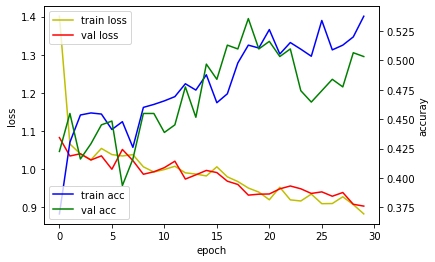

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [35]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [36]:
# 성능 측정
loss,metrics = model.evaluate(X_test,y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print("loss :",loss)
print("accuracy :", metrics)

326/326 [==============================] - 1s 4ms/step
## evaluation loss and_metrics ##
loss : 10916.763289188315
accuracy : 0.401840478181839
